<a href="https://colab.research.google.com/github/NakiMillicent/Data-Science-For-Beginners/blob/main/AI_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import r2_score,accuracy_score
from sklearn.svm import SVC
from sklearn.feature_selection import VarianceThreshold
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pylab
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


#Reading CSV files using Pandas
train_data= pd.read_csv(r"Training.csv")
print('Training CSV has been read successfully')

test_data = pd.read_csv('Testing.csv')
print('Testing CSV has been read successfully')


Training CSV has been read successfully
Testing CSV has been read successfully


Exploratory Data Analysis


Exploring Training Data

In [ ]:
train_data.head(5)

In [ ]:
train_data.isnull().any()

In [ ]:
# Dropping the unnamed column
train_data.drop('Unnamed: 133', axis=1, inplace=True)
print('Unnamed column dropped successfully.')

In [ ]:
# Verify if the dropped column affects analysis adversely
# For example, check if it contains important information

In [ ]:
print("Total number of observations in the training dataset:", train_data.shape[0])
print("Total number of features in the training dataset:", train_data.shape[1])
print("Total number of unique diseases in the training dataset:", train_data['prognosis'].nunique())
print("\n Summary information about the dataset:")
print(train_data.info())

In [ ]:
# Checking the total number of each prognosis
prognosis_counts = train_data.prognosis.value_counts()
print(prognosis_counts)

In [ ]:
# Checking if there any missing values in each column of training data
train_data.isna().sum()

In [ ]:
# Plot the counts
plt.figure(figsize=(10, 8))
prognosis_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Count')
plt.title('Distribution of Classes')
plt.grid(axis='x')
plt.show()

print(f'**Dataset Summary**:\n There are 41 diseases in the dataset and each contain 120 rows. Meaning the dataset is equally balanced.')

In [ ]:
# Detecting Outliers
temp_df=train_data.iloc[:,:-1]
plt.subplots(figsize=(18,10))
temp_df.iloc[:,:50].boxplot()
plt.xticks(rotation=90)
plt.show()

plt.subplots(figsize=(18,10))
temp_df.iloc[:,50:].boxplot()
plt.xticks(rotation=90)
plt.show()

print(f'**Summary**:\n No outliers detected')

Visualising the correlation matrix...
Non-numeric columns found: Index(['prognosis'], dtype='object')
Target variable 'prognosis' encoded using OneHotEncoder.
Correlation matrix visualization completed.


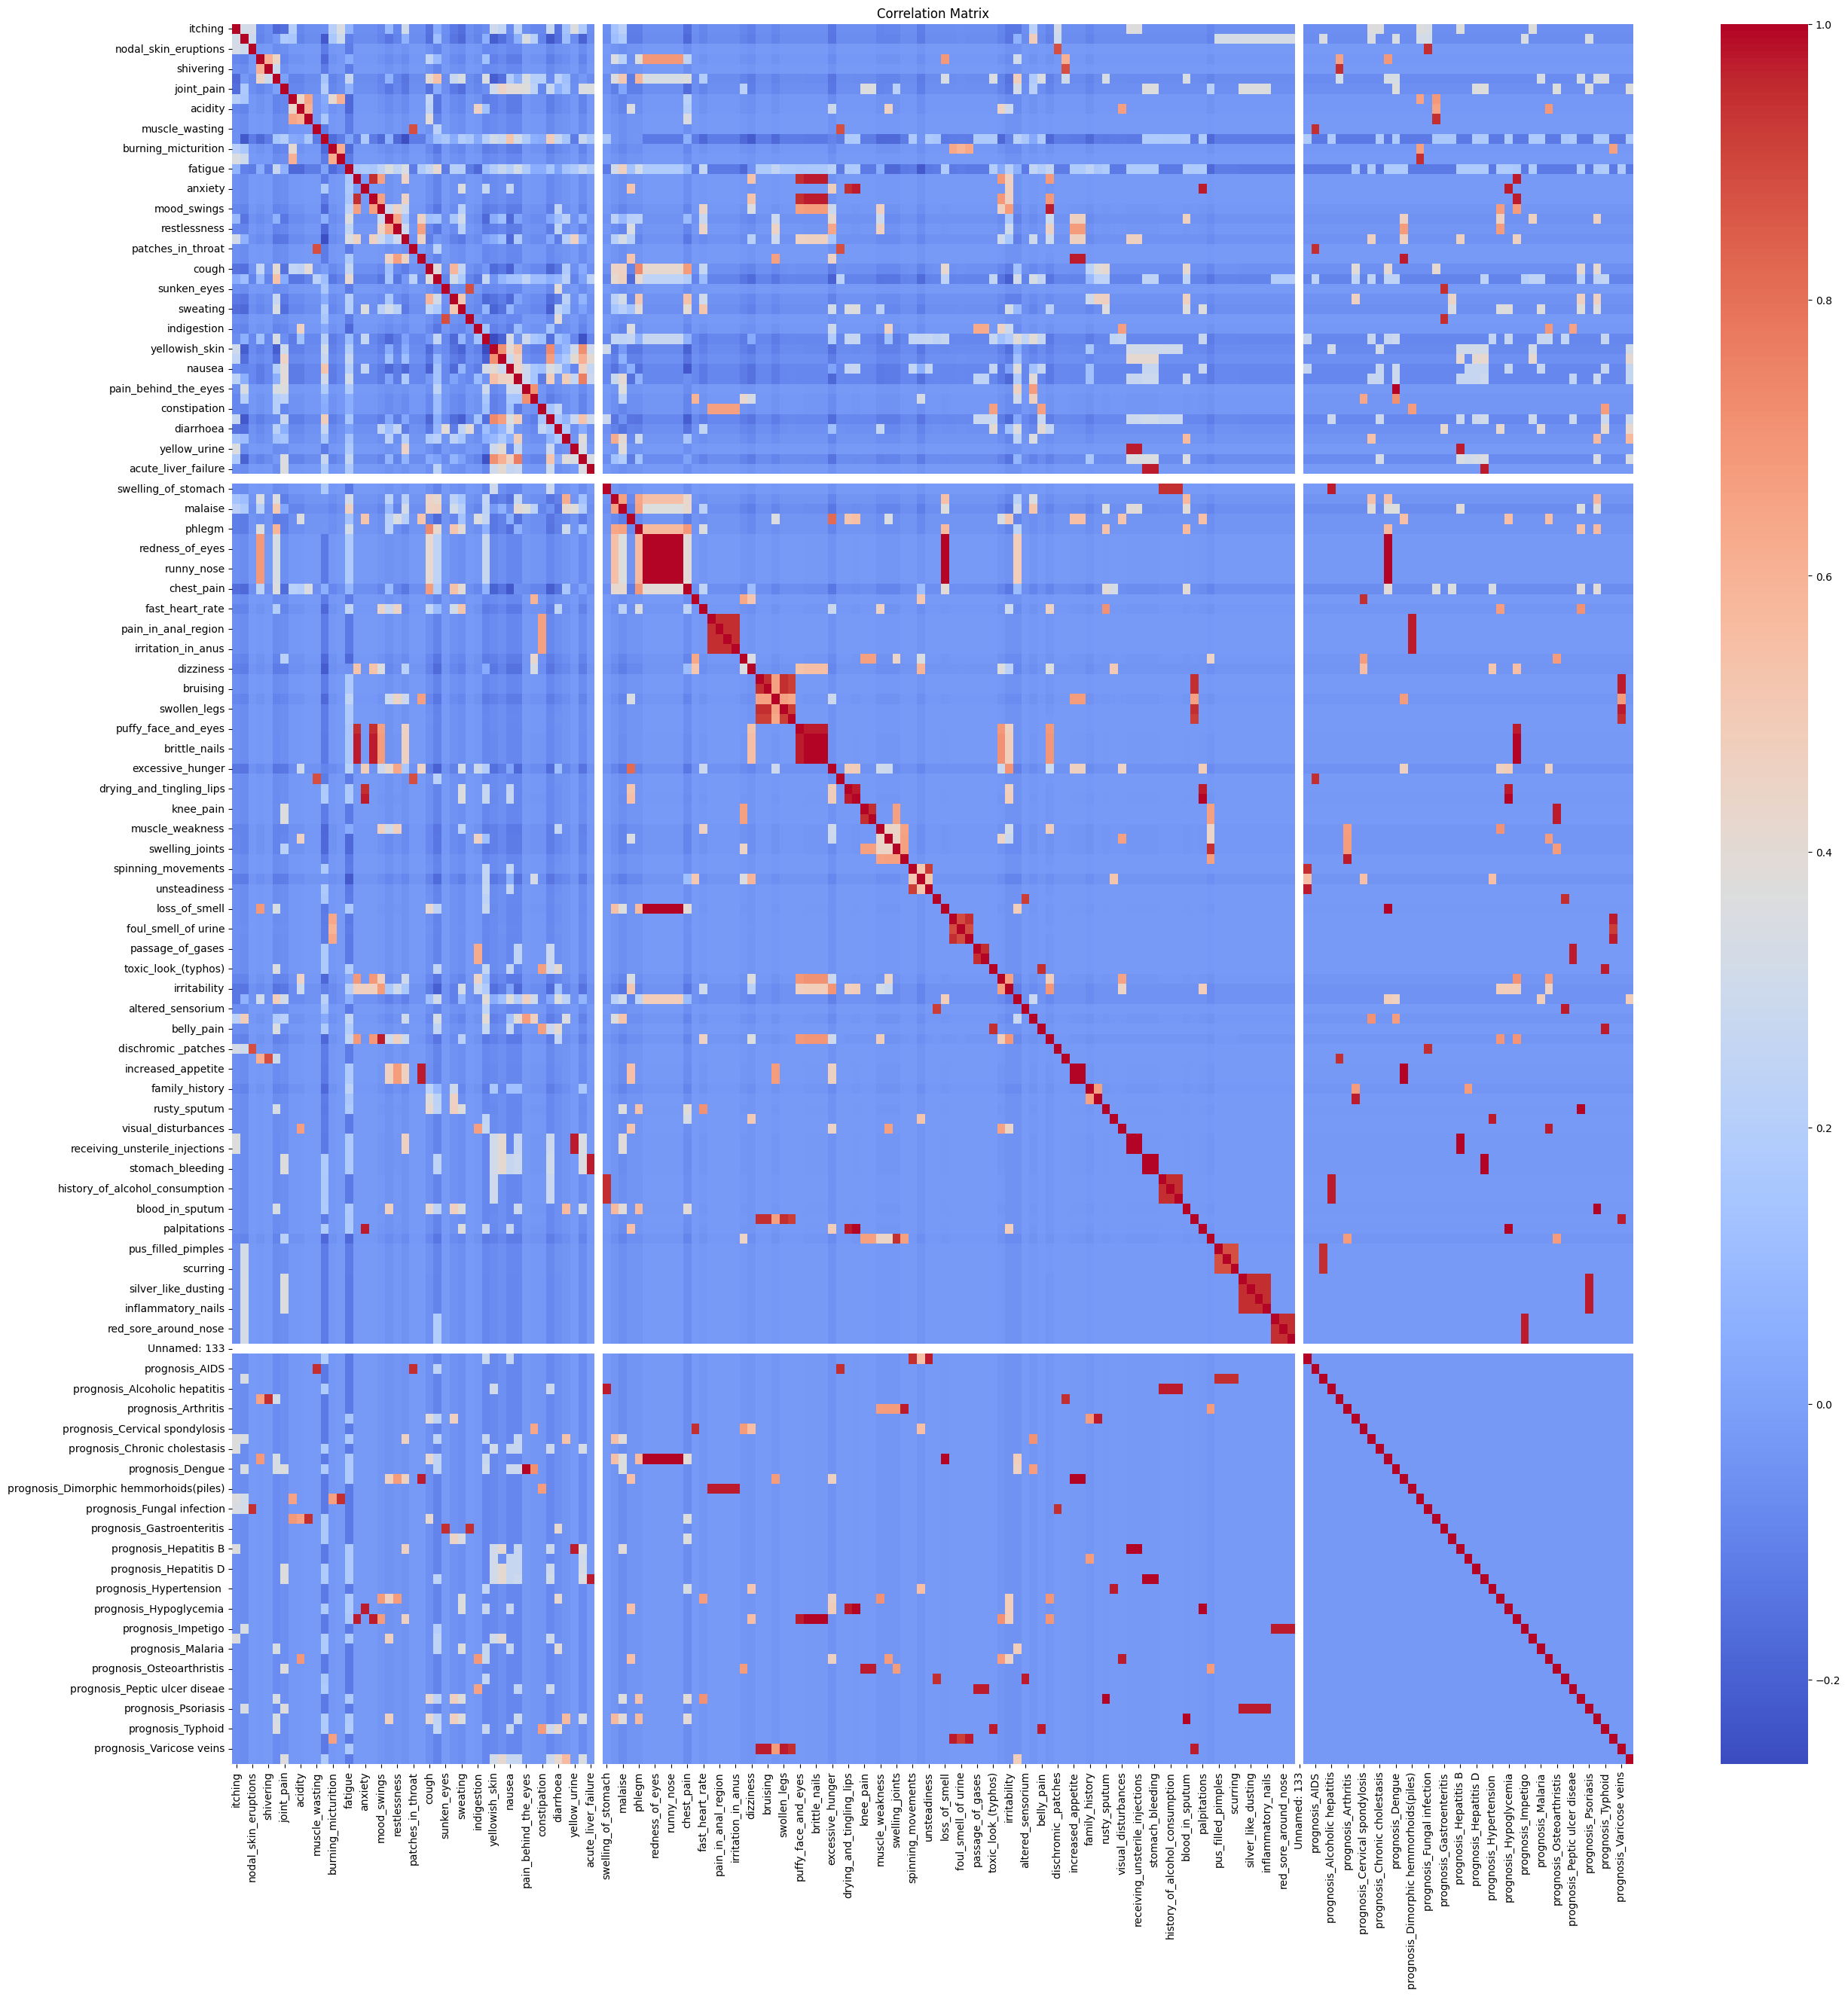

In [ ]:
# Correlation Matrix
print('Visualising the correlation matrix...')

# Finding non numeric columns
non_numeric_columns = train_data.select_dtypes(include=['object']).columns
print("Non-numeric columns found:", non_numeric_columns)

# #converting 'Prognosis'  column into numerical values using LabelEncoder
# le = LabelEncoder()
# train_data['prognosis'] = le.fit_transform(train_data['prognosis'])
# print("Prognosis column converted to numerical values.")

# Using OneHotEncoder to encode the target variable 'prognosis'
encoder = OneHotEncoder(sparse=False)
prognosis_encoded = encoder.fit_transform(train_data[['prognosis']])
train_data.drop('prognosis', axis=1, inplace=True)
train_data = pd.concat([train_data, pd.DataFrame(prognosis_encoded, columns=encoder.get_feature_names_out(['prognosis']))], axis=1)
print("Target variable 'prognosis' encoded using OneHotEncoder.")

# Plotting the correlation matrix
plt.figure(figsize = (30, 30))
heatmap = sns.heatmap(train_data.corr(), cmap = 'coolwarm', annot = False)
heatmap.set_title('Correlation Matrix')
print("Correlation matrix visualization completed.")

# Display heatmap
plt.show()

Exploring the test data


In [ ]:
test_data.head(5)

In [ ]:
test_data.isna().sum()

Feature Selection

In [ ]:
# Pearson Correlation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# Assuming your dataset is stored in a DataFrame called df

# Compute the correlation matrix
corr_matrix = train_data.corr()

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Select features with correlation coefficient greater than a threshold
threshold = 0.7
high_corr_features = corr_matrix[abs(corr_matrix) > threshold]
high_corr_features = high_corr_features[high_corr_features < 1]
high_corr_pairs = high_corr_features.unstack().dropna().to_dict()

# Print highly correlated features
print("Highly correlated features:")
for k, v in high_corr_pairs.items():
    print(k, v)




Choosing a Classification Algorithm

In [ ]:
classification_models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_jobs=-1, random_state=666),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier()
}

Training the Testing Data

In [ ]:
#  Splitting the data into training, validation, and test sets
from sklearn.model_selection import train_test_split

# Initial split: split the dataset into training set and holdout set
X_train_val, X_test, y_train_val, y_test = train_test_split(train_data.drop('prognosis', axis=1),
                                                            train_data['prognosis'],
                                                            test_size=0.3,
                                                            random_state=42)

# Secondary split: split the holdout set into validation set and test set
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                  test_size=0.25,
                                                  random_state=42)

# Print the sizes of the resulting sets
print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Test set size:", X_test.shape[0])


Model Training

In [ ]:
# Handling Missing Values
from sklearn.impute import SimpleImputer

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform the training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform the validation and test data using the fitted imputer
X_val_imputed = imputer.transform(X_val)
X_test_imputed = imputer.transform(X_test)



from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Define classification models
classification_models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_jobs=-1, random_state=666),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier()
}

from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initializing an empty list to store the results
results_list = []

# Training and evaluating each model
for model_name, model in classification_models.items():
    # Train the model on the imputed training data
    model.fit(X_train_imputed, y_train)

    # Make predictions on the training set
    y_train_pred = model.predict(X_train_imputed)

    # Make predictions on the validation set
    y_val_pred = model.predict(X_val_imputed)

    # Calculate training accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Calculate validation accuracy
    val_accuracy = accuracy_score(y_val, y_val_pred)

    # Save the results in the list
    results_list.append({
        'Model': model_name,
        'Training Accuracy': train_accuracy,
        'Validation Accuracy': val_accuracy
    })

# Further exploration: Feature Importance using Random Forest
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initializing an empty list to store the results
results_list = []

# Training and evaluating each model
for model_name, model in classification_models.items():
    # Train the model on the imputed training data
    model.fit(X_train_imputed, y_train)

    # Make predictions on the training set
    y_train_pred = model.predict(X_train_imputed)

    # Make predictions on the validation set
    y_val_pred = model.predict(X_val_imputed)

    # Calculate training accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Calculate validation accuracy
    val_accuracy = accuracy_score(y_val, y_val_pred)

    # Save the results in the list
    results_list.append({
        'Model': model_name,
        'Training Accuracy': train_accuracy,
        'Validation Accuracy': val_accuracy
    })

# Further exploration: Feature Importance using Random Forest
if model_name == 'Random Forest':
    rf_classifier = model
    # Get the column names
if 'prognosis' in train_data.columns:
    column_names = train_data.drop('prognosis', axis=1).columns
else:
    column_names = train_data.columns



# Print feature importances
print("Feature Importances for Random Forest:")
for feature, importance in zip(column_names, feature_importances):
    print(f"{feature}: {importance}")

# # Get feature importances
#     feature_importances = rf_classifier.feature_importances_

# # Print feature importances
# print("Feature Importances for Random Forest:")
# for feature, importance in zip(X_train_imputed.columns, feature_importances):
#             print(f"{feature}: {importance}")

# Model Evaluation: cross-validation
scoring = {'accuracy': 'accuracy',
               'precision_macro': make_scorer(precision_score, average='macro'),
               'recall_macro': make_scorer(recall_score, average='macro'),
               'f1_macro': make_scorer(f1_score, average='macro'),
               'roc_auc_ovr': make_scorer(roc_auc_score, needs_proba=True, multi_class='ovr')}
cv_results = cross_validate(model, X_train_imputed, y_train, cv=5, scoring=scoring)

# Print cross-validation results
print("\nCross-Validation Results for", model_name)
print("Accuracy:", np.mean(cv_results['test_accuracy']))
print("Precision:", np.mean(cv_results['test_precision_macro']))
print("Recall:", np.mean(cv_results['test_recall_macro']))
print("F1-score:", np.mean(cv_results['test_f1_macro']))
print("ROC-AUC:", np.mean(cv_results['test_roc_auc_ovr']))
print("\n")

# Create a DataFrame from the list of results
results_df = pd.DataFrame(results_list)

# Print the DataFrame
print(results_df)



Feature Importances for Random Forest:
itching: 0.01860743807811666
skin_rash: 0.010709568982236928
nodal_skin_eruptions: 0.012169522576804126
continuous_sneezing: 0.003777241722516753
shivering: 0.009521959255571245
chills: 0.011381945362633934
joint_pain: 0.014267390201895241
stomach_pain: 0.016614581393785355
acidity: 0.004985627410422444
ulcers_on_tongue: 0.005309152302070255
muscle_wasting: 0.0062514008086770045
vomiting: 0.016544082069147426
burning_micturition: 0.007277185388470149
spotting_ urination: 0.012011702679366446
fatigue: 0.014742650319908877
weight_gain: 0.0028310722846463946
anxiety: 0.0027642009670938283
cold_hands_and_feets: 0.004297989571091498
mood_swings: 0.004373821202416508
weight_loss: 0.01369447737452288
restlessness: 0.005366078255468366
lethargy: 0.006016731925908664
patches_in_throat: 0.006442913440510487
irregular_sugar_level: 0.004571273566816923
cough: 0.006361751796500285
high_fever: 0.014021119165177738
sunken_eyes: 0.005548969684201389
breathlessnes

Investigating accuracy of models

Cross-Validation Results:
fit_time: 2.798845672607422 (±0.6792835366682534)
score_time: 0.07315583229064941 (±0.02484630831776299)
test_accuracy: 1.0 (±0.0)
test_precision_macro: 1.0 (±0.0)
test_recall_macro: 1.0 (±0.0)
test_f1_macro: 1.0 (±0.0)
test_roc_auc_ovr: 1.0 (±0.0)


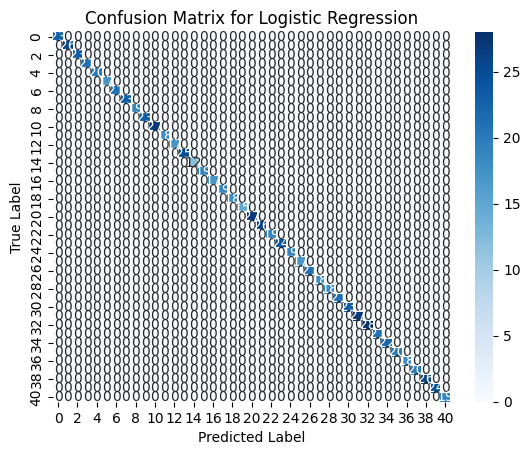

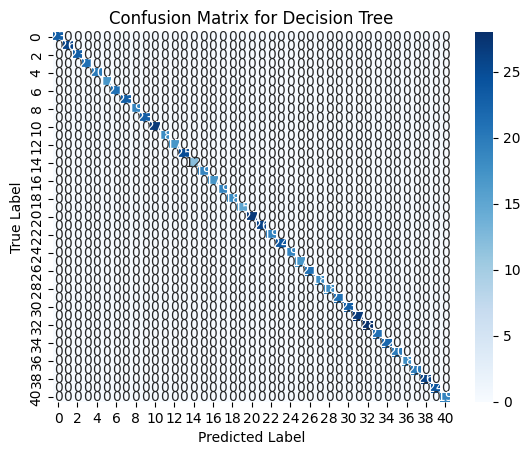

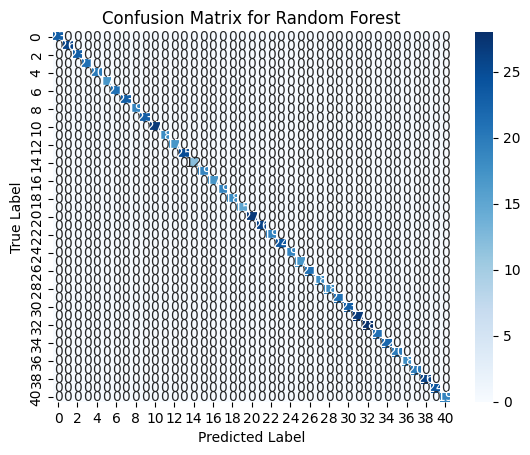

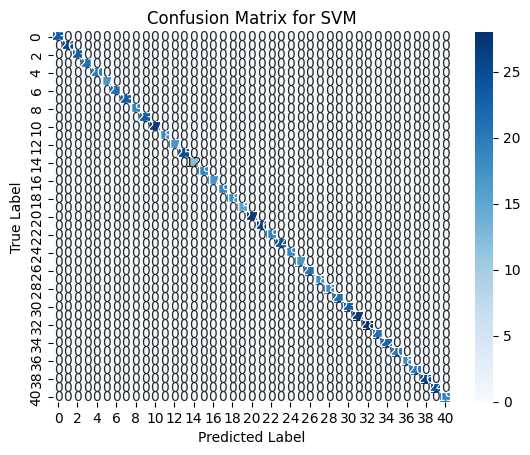

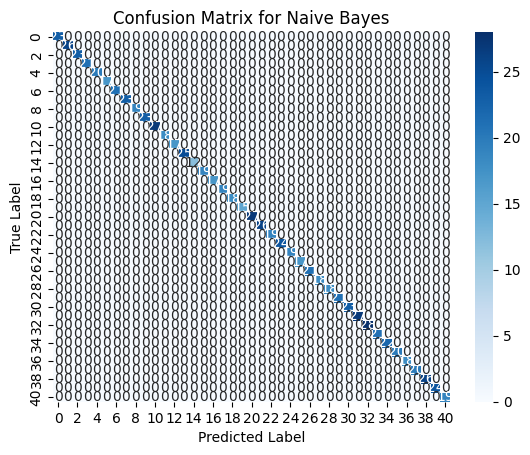

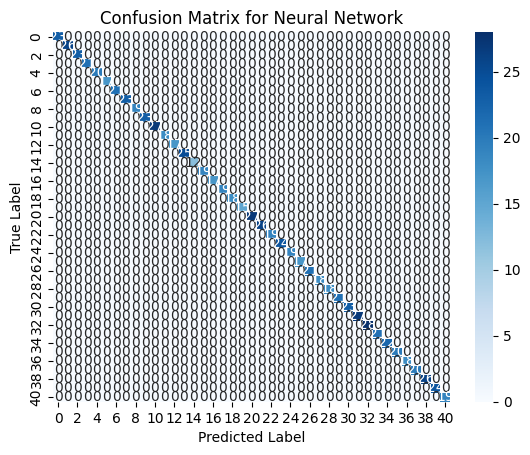

ValueError: All arrays must be of the same length

In [ ]:

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns

# Cross-Validation
cv_results = cross_validate(model, X_train_imputed, y_train, cv=5, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'roc_auc_ovr'])

# Print cross-validation results
print("Cross-Validation Results:")
for metric, scores in cv_results.items():
    print(f"{metric}: {scores.mean()} (±{scores.std()})")

# Confusion Matrix
for model_name, model in classification_models.items():
    model.fit(X_train_imputed, y_train)
    y_pred = model.predict(X_val_imputed)
    cm = confusion_matrix(y_val, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


# Feature Importance (Random Forest)
rf_classifier = classification_models['Random Forest']
rf_classifier.fit(X_train_imputed, y_train)

# Print feature importances
feature_importances = rf_classifier.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances for Random Forest:")
print(feature_importance_df)

# Hyperparameter Tuning (Grid Search )
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_jobs=-1, random_state=666)

# Initialize Grid Search
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# Perform Grid Search
grid_search.fit(X_train_imputed, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Model Ensemble: combining predictions of multiple models
from sklearn.ensemble import VotingClassifier

# Definining ensemble of models
estimators = [('logistic_regression', classification_models['Logistic Regression']),
              ('decision_tree', classification_models['Decision Tree']),
              ('random_forest', classification_models['Random Forest']),
              ('svm', classification_models['SVM']),
              ('naive_bayes', classification_models['Naive Bayes']),
              ('neural_network', classification_models['Neural Network'])]

# Initialising Voting Classifier
voting_classifier = VotingClassifier(estimators)

# Training Voting Classifier
voting_classifier.fit(X_train_imputed, y_train)

# Evaluating Voting Classifier
voting_accuracy = voting_classifier.score(X_val_imputed, y_val)
print("Voting Classifier Accuracy:", voting_accuracy)




Employing stacking methods with decision tress and neural networks as selected models

In [77]:
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

# Define base models
base_models = [
    ('decision_tree', DecisionTreeClassifier()),
    ('neural_network', MLPClassifier())
]

# Define meta-model
meta_model = LogisticRegression()

# Initialize stacking classifier
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train stacking classifier
stacking_classifier.fit(X_train_imputed, y_train)

# Evaluate stacking classifier
stacking_accuracy = stacking_classifier.score(X_val_imputed, y_val)
print("Stacking Classifier Accuracy:", stacking_accuracy)


Stacking Classifier Accuracy: 1.0
